In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 45.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=3fdf1b0d9a3618ebfbe0f059cc596c59424528cd61da17c08431cc0d8ce249cc
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
import pyspark
from pyspark import SparkContext

sc = SparkContext(master="local[2]")

In [3]:
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("BDAMiniProject").getOrCreate()

In [5]:
import pandas 
from pyspark.sql.functions import * 
from pyspark.ml import Pipeline 
from pyspark.ml.feature import VectorAssembler 
from pyspark.ml.feature import StringIndexer 
from pyspark.ml.classification import NaiveBayes 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix

In [8]:
data = spark.read.csv("/train.csv",header=True)

In [9]:
data.head(5)

[Row(Dates='2015-05-13 23:53:00', Category='WARRANTS', Descript='WARRANT ARREST', DayOfWeek='Wednesday', PdDistrict='NORTHERN', Resolution='ARREST, BOOKED', Address='OAK ST / LAGUNA ST', X='-122.425891675136', Y='37.7745985956747'),
 Row(Dates='2015-05-13 23:53:00', Category='OTHER OFFENSES', Descript='TRAFFIC VIOLATION ARREST', DayOfWeek='Wednesday', PdDistrict='NORTHERN', Resolution='ARREST, BOOKED', Address='OAK ST / LAGUNA ST', X='-122.425891675136', Y='37.7745985956747'),
 Row(Dates='2015-05-13 23:33:00', Category='OTHER OFFENSES', Descript='TRAFFIC VIOLATION ARREST', DayOfWeek='Wednesday', PdDistrict='NORTHERN', Resolution='ARREST, BOOKED', Address='VANNESS AV / GREENWICH ST', X='-122.42436302145', Y='37.8004143219856'),
 Row(Dates='2015-05-13 23:30:00', Category='LARCENY/THEFT', Descript='GRAND THEFT FROM LOCKED AUTO', DayOfWeek='Wednesday', PdDistrict='NORTHERN', Resolution='NONE', Address='1500 Block of LOMBARD ST', X='-122.42699532676599', Y='37.80087263276921'),
 Row(Dates='

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

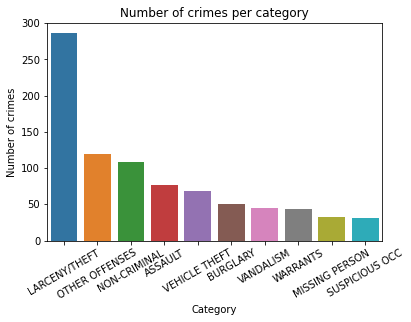

In [11]:
from pyspark.sql.functions import desc,col
Category=data.groupBy(data['Category']).count().orderBy(desc("count")).limit(10).toPandas()
plt.clf()
sns.barplot(x="Category", y="count", data=Category)
plt.title('Number of crimes per category')
plt.xlabel('Category')
plt.xticks(rotation=30)
plt.ylabel('Number of crimes')
plt.show()

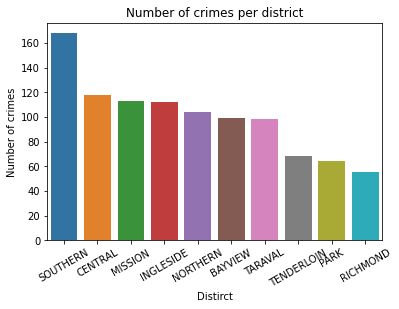

In [12]:
District=data.groupBy(data['PdDistrict']).count().orderBy(desc("count")).toPandas()
plt.clf()
sns.barplot(x="PdDistrict", y="count", data=District)
plt.title('Number of crimes per district')
plt.xlabel('Distirct')
plt.xticks(rotation=30)
plt.ylabel('Number of crimes')
plt.show()

In [13]:
data.columns

['Dates',
 'Category',
 'Descript',
 'DayOfWeek',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y']

In [14]:
from pyspark.sql.functions import isnull, when, count


In [15]:
data.select([count(when(isnull(c), c)).alias(c) for c in data.columns]).show()

+-----+--------+--------+---------+----------+----------+-------+---+---+
|Dates|Category|Descript|DayOfWeek|PdDistrict|Resolution|Address|  X|  Y|
+-----+--------+--------+---------+----------+----------+-------+---+---+
|    0|       0|       0|        0|         0|         0|      0|  0|  0|
+-----+--------+--------+---------+----------+----------+-------+---+---+



In [16]:
data=data.drop("Descript")


In [17]:
data.show(5)

+-------------------+--------------+---------+----------+--------------+--------------------+-------------------+------------------+
|              Dates|      Category|DayOfWeek|PdDistrict|    Resolution|             Address|                  X|                 Y|
+-------------------+--------------+---------+----------+--------------+--------------------+-------------------+------------------+
|2015-05-13 23:53:00|      WARRANTS|Wednesday|  NORTHERN|ARREST, BOOKED|  OAK ST / LAGUNA ST|  -122.425891675136|  37.7745985956747|
|2015-05-13 23:53:00|OTHER OFFENSES|Wednesday|  NORTHERN|ARREST, BOOKED|  OAK ST / LAGUNA ST|  -122.425891675136|  37.7745985956747|
|2015-05-13 23:33:00|OTHER OFFENSES|Wednesday|  NORTHERN|ARREST, BOOKED|VANNESS AV / GREE...|   -122.42436302145|  37.8004143219856|
|2015-05-13 23:30:00| LARCENY/THEFT|Wednesday|  NORTHERN|          NONE|1500 Block of LOM...|-122.42699532676599| 37.80087263276921|
|2015-05-13 23:30:00| LARCENY/THEFT|Wednesday|      PARK|          NO

In [18]:
data=data.drop("Address")

In [19]:
data.show(5)

+-------------------+--------------+---------+----------+--------------+-------------------+------------------+
|              Dates|      Category|DayOfWeek|PdDistrict|    Resolution|                  X|                 Y|
+-------------------+--------------+---------+----------+--------------+-------------------+------------------+
|2015-05-13 23:53:00|      WARRANTS|Wednesday|  NORTHERN|ARREST, BOOKED|  -122.425891675136|  37.7745985956747|
|2015-05-13 23:53:00|OTHER OFFENSES|Wednesday|  NORTHERN|ARREST, BOOKED|  -122.425891675136|  37.7745985956747|
|2015-05-13 23:33:00|OTHER OFFENSES|Wednesday|  NORTHERN|ARREST, BOOKED|   -122.42436302145|  37.8004143219856|
|2015-05-13 23:30:00| LARCENY/THEFT|Wednesday|  NORTHERN|          NONE|-122.42699532676599| 37.80087263276921|
|2015-05-13 23:30:00| LARCENY/THEFT|Wednesday|      PARK|          NONE|  -122.438737622757|37.771541172057795|
+-------------------+--------------+---------+----------+--------------+-------------------+------------

In [21]:
data.select('Category','DayOfWeek','PdDistrict','Resolution','X','Y').distinct().show()

+--------------+---------+----------+--------------+-------------------+------------------+
|      Category|DayOfWeek|PdDistrict|    Resolution|                  X|                 Y|
+--------------+---------+----------+--------------+-------------------+------------------+
|OTHER OFFENSES|Wednesday| INGLESIDE| ARREST, CITED|  -122.416824272035| 37.73488851562411|
| LARCENY/THEFT|  Tuesday|  SOUTHERN|          NONE|  -122.411071423064|  37.7817511307229|
| VEHICLE THEFT|   Monday|   TARAVAL|          NONE|  -122.466196824742|  37.7142802754796|
| LARCENY/THEFT|   Monday|  SOUTHERN|          NONE|-122.41127918996901|  37.7715785765043|
|  PROSTITUTION|   Monday|   BAYVIEW|          NONE|  -122.397744427103|  37.7299346936044|
|  NON-CRIMINAL|Wednesday|   CENTRAL|          NONE|  -122.407008625662|  37.7996968891966|
| VEHICLE THEFT|  Tuesday| INGLESIDE|          NONE|-122.42052630907801|37.744725471365705|
|     VANDALISM|  Tuesday| INGLESIDE|          NONE|   -122.44976890956|  37.741

In [22]:
data1 = data.select(col('DayOfWeek'),
                         col('DayOfWeek'),
                         col('PdDistrict'),
                         col('Resolution'),
                         col('X').cast('float'),
                         col('Y').cast('float'),
                        col('Category'),
                        )

In [23]:
required_features = [
                     'DayOfWeek1',
                    'X1',
                    'Y1',
                    'PdDistrict1',
                    'Resolution1',

                     'Category1']

In [24]:
data1 = StringIndexer(
    inputCol='DayOfWeek', 
    outputCol='DayOfWeek1', 
    handleInvalid='keep').fit(data1).transform(data1)
data1 = StringIndexer(
    inputCol='PdDistrict', 
    outputCol='PdDistrict1', 
    handleInvalid='keep').fit(data1).transform(data1)
data1 = StringIndexer(
    inputCol='Resolution', 
    outputCol='Resolution1', 
    handleInvalid='keep').fit(data1).transform(data1)
data1 = StringIndexer(
    inputCol='X', 
    outputCol='X1', 
    handleInvalid='keep').fit(data1).transform(data1)
data1 = StringIndexer(
    inputCol='Y', 
    outputCol='Y1', 
    handleInvalid='keep').fit(data1).transform(data1)


In [25]:
data1.dtypes

[('DayOfWeek', 'string'),
 ('DayOfWeek', 'string'),
 ('PdDistrict', 'string'),
 ('Resolution', 'string'),
 ('X', 'float'),
 ('Y', 'float'),
 ('Category', 'string'),
 ('DayOfWeek1', 'double'),
 ('PdDistrict1', 'double'),
 ('Resolution1', 'double'),
 ('X1', 'double'),
 ('Y1', 'double')]

In [26]:
vectorAssembler = VectorAssembler(inputCols = required_features,outputCol = "features")

In [28]:
data1 = StringIndexer(
    inputCol='Category', 
    outputCol='Category1', 
    handleInvalid='keep').fit(data1).transform(data1)

In [29]:
vindexed_train_df = vectorAssembler.transform(data1)
vindexed_train_df.show(3)

+---------+---------+----------+--------------+----------+---------+--------------+----------+-----------+-----------+-----+-----+---------+--------------------+
|DayOfWeek|DayOfWeek|PdDistrict|    Resolution|         X|        Y|      Category|DayOfWeek1|PdDistrict1|Resolution1|   X1|   Y1|Category1|            features|
+---------+---------+----------+--------------+----------+---------+--------------+----------+-----------+-----------+-----+-----+---------+--------------------+
|Wednesday|Wednesday|  NORTHERN|ARREST, BOOKED|-122.42589|37.774597|      WARRANTS|       0.0|        4.0|        1.0|146.0|122.0|      7.0|[0.0,146.0,122.0,...|
|Wednesday|Wednesday|  NORTHERN|ARREST, BOOKED|-122.42589|37.774597|OTHER OFFENSES|       0.0|        4.0|        1.0|146.0|122.0|      1.0|[0.0,146.0,122.0,...|
|Wednesday|Wednesday|  NORTHERN|ARREST, BOOKED|-122.42436|37.800415|OTHER OFFENSES|       0.0|        4.0|        1.0|469.0|666.0|      1.0|[0.0,469.0,666.0,...|
+---------+---------+-------

In [30]:
splits = vindexed_train_df.randomSplit([0.7,0.3],42)
train_df = splits[0]
test_df = splits[1]

In [32]:
nb = NaiveBayes(modelType="multinomial")
nbmodel = nb.fit(vindexed_train_df)

IllegalArgumentException: ignored